## U.S. States 2022
### Determining major political party affliation
### by Sharon Dill -- March 2022 --

#### Three files will be merged together to determine the dominant political party per State
- House of Representatives: https://www.house.gov/representatives 
- Senate: https://www.senate.gov/general/common/generic/XML_Availability.htm
   - Use beautifulsoup for Senate file in xml format
- Presidential election results: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX
- For check and balance of logic:
https://github.com/fivethirtyeight/data/blob/master/partisan-lean/2020/fivethirtyeight_partisan_lean_STATES.csv

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup #for senate file

# allows multiple output per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# https://www.house.gov/representatives 435 representatives 
house = pd.read_excel('House 2022.xlsx')
house.info()
house.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        441 non-null    object
 1   District     441 non-null    object
 2   Name         441 non-null    object
 3   Party        441 non-null    object
 4   Office Room  441 non-null    object
 5   Phone        441 non-null    object
dtypes: object(6)
memory usage: 20.8+ KB


,State,District,Name,Party,Office Room,Phone
0,Alabama,1st,"Carl, Jerry L.",R,1330 LHOB,(202) 225-4931
1,Alabama,2nd,"Moore, Barry",R,1504 LHOB,(202) 225-2901
2,Alabama,3rd,"Rogers, Mike",R,2469 RHOB,(202) 225-3261
3,Alabama,4th,"Aderholt, Robert",R,266 CHOB,(202) 225-4876
4,Alabama,5th,"Brooks, Mo",R,2185 RHOB,(202) 225-4801


In [3]:
territory = ['American Samoa','District of Columbia','Guam','Northern Mariana Islands','Puerto Rico','Virgin Islands']
# use only the fifty states
house50 = house[~house['State'].isin(territory)]
house50.head()

,State,District,Name,Party,Office Room,Phone
0,Alabama,1st,"Carl, Jerry L.",R,1330 LHOB,(202) 225-4931
1,Alabama,2nd,"Moore, Barry",R,1504 LHOB,(202) 225-2901
2,Alabama,3rd,"Rogers, Mike",R,2469 RHOB,(202) 225-3261
3,Alabama,4th,"Aderholt, Robert",R,266 CHOB,(202) 225-4876
4,Alabama,5th,"Brooks, Mo",R,2185 RHOB,(202) 225-4801


In [4]:
# 117th congress - 222 Democrats, 213 Republicans
house['Party'].value_counts()
# will use fifty states
house50['Party'].value_counts()

D    226
R    215
Name: Party, dtype: int64

D    222
R    213
Name: Party, dtype: int64

In [5]:
house50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 440
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        435 non-null    object
 1   District     435 non-null    object
 2   Name         435 non-null    object
 3   Party        435 non-null    object
 4   Office Room  435 non-null    object
 5   Phone        435 non-null    object
dtypes: object(6)
memory usage: 23.8+ KB


In [6]:

house50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 440
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        435 non-null    object
 1   District     435 non-null    object
 2   Name         435 non-null    object
 3   Party        435 non-null    object
 4   Office Room  435 non-null    object
 5   Phone        435 non-null    object
dtypes: object(6)
memory usage: 23.8+ KB


In [7]:
# create a numeric field to track republicans
house50 = house50.reset_index()
house50['Rep'] = np.where(house50['Party'] == 'R', 1, 0)
house50['Rep'].value_counts()
id(house50)

0    222
1    213
Name: Rep, dtype: int64

2173508208096

In [8]:
# get percent of house representatives that are Republican per state
# a 1 value is 100% R and a 0 value is all Democrat
house_final = house50.groupby('State').apply(lambda x: x['Rep'].sum()/x['Rep'].count()).reset_index()
house_final.rename(columns = {house_final.columns[1] : 'houseRep'}, inplace = True)
house_final['State'] = house_final['State'].str.upper()

house_final

,State,houseRep
0,ALABAMA,0.857143
1,ALASKA,1.000000
2,ARIZONA,0.444444
3,ARKANSAS,1.000000
4,CALIFORNIA,0.207547
5,COLORADO,0.428571
6,CONNECTICUT,0.000000
7,DELAWARE,0.000000
8,FLORIDA,0.592593
9,GEORGIA,0.571429


In [9]:
# read in senate data
# https://www.senate.gov/general/common/generic/XML_Availability.htm
with open('Senate 2022.xml','r') as f:
    data = f.read()
soup = BeautifulSoup(data, 'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<contact_information>
<member>
<member_full>Baldwin (D-WI)</member_full>
<last_name>Baldwin</last_name>
<first_name>Tammy</first_name>
<party>D</party>
<state>WI</state>
<address>709 Hart Senate Office Building Washington DC 20510</address>
<phone>(202) 224-5653</phone>
<email>https://www.baldwin.senate.gov/feedback</email>
<website>https://www.baldwin.senate.gov/</website>
<class>Class I</class>
<bioguide_id>B001230</bioguide_id>
</member>
<member>
<member_full>Barrasso (R-WY)</member_full>
<last_name>Barrasso</last_name>
<first_name>John</first_name>
<party>R</party>
<state>WY</state>
<address>307 Dirksen Senate Office Building Washington DC 20510</address>
<phone>(202) 224-6441</phone>
<email>https://www.barrasso.senate.gov/public/index.cfm/contact-form</email>
<website>https://www.barrasso.senate.gov</website>
<class>Class I</class>
<bioguide_id>B001261</bioguide_id>
</member>
<member>
<member_full>Bennet (D-CO)</member_full>
<last_name>Bennet

In [10]:
# get particular fields
last = soup.find_all('last_name')
first = soup.find_all('first_name')
party = soup.find_all('party')
state = soup.find_all('state')

data = []
for i in range(0,len(last)):
    rows = [last[i].get_text(), first[i].get_text(), 
            party[i].get_text(), state[i].get_text()]
    data.append(rows)

In [11]:
df_cols = ['first','last','Party','State_abbr']
senate = pd.DataFrame(data, columns = df_cols)

# got the names for check and balance
senate.info()
senate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first       100 non-null    object
 1   last        100 non-null    object
 2   Party       100 non-null    object
 3   State_abbr  100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


,first,last,Party,State_abbr
0,Baldwin,Tammy,D,WI
1,Barrasso,John,R,WY
2,Bennet,Michael F.,D,CO
3,Blackburn,Marsha,R,TN
4,Blumenthal,Richard,D,CT


In [12]:
# 117th Congress
senate['Party'].value_counts()

R    50
D    48
I     2
Name: Party, dtype: int64

In [13]:
# independents caucas as democrats
senate['Party'] = np.where(senate['Party'] == 'I', 'D', senate['Party'])
senate['Party'].value_counts()

R    50
D    50
Name: Party, dtype: int64

In [14]:
# get percent Republican per state
senate['Rep'] = np.where(senate['Party'] == 'R', 1, 0)

senate_final = senate.groupby('State_abbr').apply(lambda x: x['Rep'].sum()/x['Rep'].count()).reset_index()
senate_final.rename(columns = {senate_final.columns[1] : 'senateRep'}, inplace = True)

senate_final

,State_abbr,senateRep
0,AK,1.0
1,AL,1.0
2,AR,1.0
3,AZ,0.0
4,CA,0.0
5,CO,0.0
6,CT,0.0
7,DE,0.0
8,FL,1.0
9,GA,0.0


In [15]:
# states and abbreviations

name_to_abbeviation = {
    "Alabama": "AL",       "Alaska": "AK",         "Arizona": "AZ",    "Arkansas": "AR",
    "California": "CA",    "Colorado": "CO",       "Connecticut": "CT",
    "Delaware": "DE",      "Florida": "FL",        "Georgia": "GA",    "Hawaii": "HI",
    "Idaho": "ID",         "Illinois": "IL",       "Indiana": "IN",    "Iowa": "IA",
    "Kansas": "KS",        "Kentucky": "KY",       "Louisiana": "LA",  "Maine": "ME",
    "Maryland": "MD",      "Massachusetts": "MA",  "Michigan": "MI",
    "Minnesota": "MN",     "Mississippi": "MS",    "Missouri": "MO",
    "Montana": "MT",       "Nebraska": "NE",       "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ",     "New Mexico": "NM",
    "New York": "NY",      "North Carolina": "NC", "North Dakota": "ND",
    "Ohio": "OH",          "Oklahoma": "OK",       "Oregon": "OR",      "Pennsylvania": "PA",
    "Rhode Island": "RI",  "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN",     "Texas": "TX",          "Utah": "UT",        "Vermont": "VT",
    "Virginia": "VA",      "Washington": "WA",     "West Virginia": "WV",
    "Wisconsin": "WI",     "Wyoming": "WY",        "District of Columbia": "DC",
    "American Samoa": "AS","Guam": "GU",           "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",   "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbreviation_to_name = dict(map(reversed, name_to_abbeviation.items()))

In [16]:
# need full state name for data merging
senate_final['State'] = senate_final['State_abbr'].map(abbreviation_to_name).str.upper()

#drop State_abbr
senate_final.drop(columns = 'State_abbr', inplace = True)
senate_final

,senateRep,State
0,1.0,ALASKA
1,1.0,ALABAMA
2,1.0,ARKANSAS
3,0.0,ARIZONA
4,0.0,CALIFORNIA
5,0.0,COLORADO
6,0.0,CONNECTICUT
7,0.0,DELAWARE
8,1.0,FLORIDA
9,0.0,GEORGIA


In [17]:
# presidential election data
# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX
pres = pd.read_csv('1976-2020-president.csv')

pres.info()
pres.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [18]:
# keep only 2020 election info
pres2020 = pres[pres['year'] == 2020]
pres2020 = pres2020[pres2020['state_po'] != 'DC']
pres2020.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
3740,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,849624,2323282,20210113,NaN,DEMOCRAT
3741,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN
3742,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,25176,2323282,20210113,NaN,LIBERTARIAN
3743,2020,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,7312,2323282,20210113,NaN,OTHER
3744,2020,ALASKA,AK,2,94,81,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,153778,359530,20210113,NaN,DEMOCRAT


In [19]:
# calculate percentage of total votes
pres2020['votePercent'] = round((pres2020['candidatevotes']/pres2020['totalvotes']),2)
pres2020.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,votePercent
3740,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,849624,2323282,20210113,NaN,DEMOCRAT,0.37
3741,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN,0.62
3742,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,25176,2323282,20210113,NaN,LIBERTARIAN,0.01
3743,2020,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,7312,2323282,20210113,NaN,OTHER,0.00
3744,2020,ALASKA,AK,2,94,81,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,153778,359530,20210113,NaN,DEMOCRAT,0.43


In [20]:
# only keep major parties
x = ['DEMOCRAT','REPUBLICAN']
pres2020 = pres2020[pres2020['party_simplified'].isin(x)]
pres2020.tail(10)
pres2020.info()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,votePercent
4252,2020,VIRGINIA,VA,51,54,40,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2413568,4460524,20210113,NaN,DEMOCRAT,0.54
4253,2020,VIRGINIA,VA,51,54,40,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1962430,4460524,20210113,NaN,REPUBLICAN,0.44
4256,2020,WASHINGTON,WA,53,91,73,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,2369612,4087631,20210113,NaN,DEMOCRAT,0.58
4257,2020,WASHINGTON,WA,53,91,73,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1584651,4087631,20210113,NaN,REPUBLICAN,0.39
4263,2020,WEST VIRGINIA,WV,54,55,56,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,235984,794652,20210113,NaN,DEMOCRAT,0.30
4264,2020,WEST VIRGINIA,WV,54,55,56,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,545382,794652,20210113,NaN,REPUBLICAN,0.69
4267,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1630866,3298041,20210113,NaN,DEMOCRAT,0.49
4268,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1610184,3298041,20210113,NaN,REPUBLICAN,0.49
4280,2020,WYOMING,WY,56,83,68,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,73491,278503,20210113,NaN,DEMOCRAT,0.26
4281,2020,WYOMING,WY,56,83,68,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,193559,278503,20210113,NaN,REPUBLICAN,0.69


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 3740 to 4281
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              100 non-null    int64  
 1   state             100 non-null    object 
 2   state_po          100 non-null    object 
 3   state_fips        100 non-null    int64  
 4   state_cen         100 non-null    int64  
 5   state_ic          100 non-null    int64  
 6   office            100 non-null    object 
 7   candidate         100 non-null    object 
 8   party_detailed    100 non-null    object 
 9   writein           100 non-null    object 
 10  candidatevotes    100 non-null    int64  
 11  totalvotes        100 non-null    int64  
 12  version           100 non-null    int64  
 13  notes             0 non-null      float64
 14  party_simplified  100 non-null    object 
 15  votePercent       100 non-null    float64
dtypes: float64(2), int64(7), object(7)
memor

In [21]:
# only keep certain columns
df_cols = ['state', 'state_fips', 'party_simplified','candidatevotes','votePercent']
president = pd.DataFrame(pres2020, columns = df_cols)

president.head()

president = president.rename(columns = {'party_simplified':'Party',
                                        'candidatevotes':'Votes'})

president.info()


,state,state_fips,party_simplified,candidatevotes,votePercent
3740,ALABAMA,1,DEMOCRAT,849624,0.37
3741,ALABAMA,1,REPUBLICAN,1441170,0.62
3744,ALASKA,2,DEMOCRAT,153778,0.43
3745,ALASKA,2,REPUBLICAN,189951,0.53
3752,ARIZONA,4,DEMOCRAT,1672143,0.49


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 3740 to 4281
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        100 non-null    object 
 1   state_fips   100 non-null    int64  
 2   Party        100 non-null    object 
 3   Votes        100 non-null    int64  
 4   votePercent  100 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.7+ KB


In [22]:
# keeping all Republican rows
pres_final = president[president['Party'] == 'REPUBLICAN']

# drop columns
cols = ['Party','Votes']
pres_final = pres_final.reset_index()
pres_final.drop(columns = cols, inplace = True)

# rename state

pres_final.rename(columns = {'state':'State',
                          'votePercent':'presRep'}, inplace = True)
pres_final.head()
pres_final.info()

,index,State,state_fips,presRep
0,3741,ALABAMA,1,0.62
1,3745,ALASKA,2,0.53
2,3753,ARIZONA,4,0.49
3,3771,ARKANSAS,5,0.62
4,3774,CALIFORNIA,6,0.34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       50 non-null     int64  
 1   State       50 non-null     object 
 2   state_fips  50 non-null     int64  
 3   presRep     50 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ KB


In [23]:
# take a look at files to merge
house_final.info()
senate_final.info()
pres_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   houseRep  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   senateRep  50 non-null     float64
 1   State      50 non-null     object 
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       50 non-null     int64  
 1   State       50 non-null     object 
 2   state_fips  50 non-null     int64  
 3   presRep     50 non-null     float64
dtypes: float64(1)

In [24]:
# merge files on the state name
final = pd.merge(house_final, senate_final, on = 'State')
final = pd.merge(final, pres_final, on = 'State')
final

,State,houseRep,senateRep,index,state_fips,presRep
0,ALABAMA,0.857143,1.0,3741,1,0.62
1,ALASKA,1.000000,1.0,3745,2,0.53
2,ARIZONA,0.444444,0.0,3753,4,0.49
3,ARKANSAS,1.000000,1.0,3771,5,0.62
4,CALIFORNIA,0.207547,0.0,3774,6,0.34
5,COLORADO,0.428571,0.0,3785,8,0.42
6,CONNECTICUT,0.000000,0.0,3808,9,0.39
7,DELAWARE,0.000000,0.0,3839,10,0.40
8,FLORIDA,0.592593,1.0,3850,12,0.51
9,GEORGIA,0.571429,0.0,3879,13,0.49


### Logic behind calculating the total representation of a state to be Republican

- houseRep: contains a value between 0 and 1 where the closer to 1, the more Republican representation for the state.
- senateRep: contains a value of either 0, .5 or 1. 0 is no Republican Senator, .5 is one out of two and a score of 1 is both Senators are Republican.
- presRep: contains a value between 0 and 1 where the close to 1, the more people voted Republican in the state in the 2020 elections.
- totalRep: is the summation of the three columns where the score ranges from .30 to 2.69
  - the most democratic state is Vermont
  - the most republican state is Wyoming


In [25]:
# get a state total by adding house, senate and presidental votes together
final['totalRep'] = final['houseRep'] + final['senateRep'] + final['presRep']
final.sort_values('totalRep', ascending = True)

,State,houseRep,senateRep,index,state_fips,presRep,totalRep
44,VERMONT,0.000000,0.0,4229,50,0.30,0.300000
20,MASSACHUSETTS,0.000000,0.0,4015,25,0.32,0.320000
10,HAWAII,0.000000,0.0,3882,15,0.34,0.340000
6,CONNECTICUT,0.000000,0.0,3808,9,0.39,0.390000
38,RHODE ISLAND,0.000000,0.0,4174,44,0.39,0.390000
7,DELAWARE,0.000000,0.0,3839,10,0.40,0.400000
19,MARYLAND,0.125000,0.0,3988,24,0.32,0.445000
28,NEW HAMPSHIRE,0.000000,0.0,4077,33,0.45,0.450000
4,CALIFORNIA,0.207547,0.0,3774,6,0.34,0.547547
29,NEW JERSEY,0.166667,0.0,4099,34,0.41,0.576667


### Check and balnace - is this data accurate in showing the political leaning of each state?

#### Let's use data from fivethirtyeight.com to test our idea and calculations

In [26]:
# https://github.com/fivethirtyeight/data/blob/master/partisan-lean/2020/fivethirtyeight_partisan_lean_STATES.csv
x538 = pd.read_csv('fivethirtyeight_lean_states_2020.csv')
x538.head()

,"state,2020"
0,"Alabama,R+27"
1,"Alaska,R+16"
2,"Arizona,R+8"
3,"Arkansas,R+26"
4,"California,D+22"


### 538 lean state data contains:
- State
- Leaning: which has the party plus a number which represents the degree of lean
  - R+45 is the largest Republican lean (Wyoming)
  - R+0 is a neutral state (Colorado)
  - D+36 is the largest Democrat lean (Hawaii)



In [27]:
# split out column
x538['State'] = x538['state,2020'].str.split(',').str[0]
x538['Leaning'] = x538['state,2020'].str.split(',').str[1]
# drop original mixed column
x538.drop(columns = 'state,2020', inplace = True)
x538.head()

,State,Leaning
0,Alabama,R+27
1,Alaska,R+16
2,Arizona,R+8
3,Arkansas,R+26
4,California,D+22


In [28]:
# split out Leaning column 
x538['Party'] = x538['Leaning'].str.split('+').str[0]
x538['Degree'] = x538['Leaning'].str.split('+').str[1]
x538['Degree'] = x538['Degree'].astype(int)
x538.head()
x538.info()

,State,Leaning,Party,Degree
0,Alabama,R+27,R,27
1,Alaska,R+16,R,16
2,Arizona,R+8,R,8
3,Arkansas,R+26,R,26
4,California,D+22,D,22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    50 non-null     object
 1   Leaning  50 non-null     object
 2   Party    50 non-null     object
 3   Degree   50 non-null     int32 
dtypes: int32(1), object(3)
memory usage: 1.5+ KB


In [29]:
# upshift state for later use in merge
x538['State'] = x538['State'].str.upper()

#### Show degree of Republican or Democrat with the number of degree provided by fivethirtyeight
- For R+ (Republican leaning) states, we will add 100 to the Degree number
- For D+ (Democratic leaning) states, we will subtract 100 from the Degree number
- Wyoming has the highest score of 147 which means it is the most Republican leaning (matches our data)
- Hawaii has the lowest score of 64 which means it is the most Democratic leaning
- Note that Vermont is the second most Democratic leaning state, which was number one in our calculation

In [30]:
# calculate the political lean
x538['RepLean538'] = np.where(x538['Party'] == 'R',100 + x538['Degree'], 100 - x538['Degree'])

# sort by new score showing the amount of Republican leaning - higher # is more Republican
x538.sort_values(['RepLean538'])

,State,Leaning,Party,Degree,RepLean538
10,HAWAII,D+36,D,36,64
44,VERMONT,D+24,D,24,76
38,RHODE ISLAND,D+24,D,24,76
20,MASSACHUSETTS,D+23,D,23,77
19,MARYLAND,D+23,D,23,77
31,NEW YORK,D+22,D,22,78
4,CALIFORNIA,D+22,D,22,78
46,WASHINGTON,D+15,D,15,85
12,ILLINOIS,D+13,D,13,87
7,DELAWARE,D+12,D,12,88


In [31]:
# create a temporary dataframe for merging purposes 
temp = x538[['State','RepLean538']]
temp = temp.reset_index()
temp['State'] = temp['State'].str.upper()
temp.head()

,index,State,RepLean538
0,0,ALABAMA,127
1,1,ALASKA,116
2,2,ARIZONA,108
3,3,ARKANSAS,126
4,4,CALIFORNIA,78


In [32]:
# putting our calculation of political leaning in same dataframe as 538 data
testingLean = pd.merge(final, temp, on = 'State')
testingLean.head()

,State,houseRep,senateRep,index_x,state_fips,presRep,totalRep,index_y,RepLean538
0,ALABAMA,0.857143,1.0,3741,1,0.62,2.477143,0,127
1,ALASKA,1.000000,1.0,3745,2,0.53,2.530000,1,116
2,ARIZONA,0.444444,0.0,3753,4,0.49,0.934444,2,108
3,ARKANSAS,1.000000,1.0,3771,5,0.62,2.620000,3,126
4,CALIFORNIA,0.207547,0.0,3774,6,0.34,0.547547,4,78


### .91 positive correlation between our political leaning value and 538

This is a good sign that our logic is solid and our data is good to use going forward.

In [33]:
# see how correlated our score is compared to 538
x = testingLean[['houseRep','senateRep','presRep','totalRep','RepLean538']]
x.corr()

,houseRep,senateRep,presRep,totalRep,RepLean538
houseRep,1.000000,0.830403,0.915211,0.949774,0.905023
senateRep,0.830403,1.000000,0.825066,0.961253,0.818548
presRep,0.915211,0.825066,1.000000,0.922707,0.970307
totalRep,0.949774,0.961253,0.922707,1.000000,0.911695
RepLean538,0.905023,0.818548,0.970307,0.911695,1.000000


In [34]:
final['Party'] = 'Purple'
final['Party'] = np.where(final['totalRep'] <= .8, 'Blue', final['Party'])
final['Party'] = np.where(final['totalRep'] > 1.9, 'Red', final['Party'])
final.sort_values('totalRep')

,State,houseRep,senateRep,index,state_fips,presRep,totalRep,Party
44,VERMONT,0.000000,0.0,4229,50,0.30,0.300000,Blue
20,MASSACHUSETTS,0.000000,0.0,4015,25,0.32,0.320000,Blue
10,HAWAII,0.000000,0.0,3882,15,0.34,0.340000,Blue
6,CONNECTICUT,0.000000,0.0,3808,9,0.39,0.390000,Blue
38,RHODE ISLAND,0.000000,0.0,4174,44,0.39,0.390000,Blue
7,DELAWARE,0.000000,0.0,3839,10,0.40,0.400000,Blue
19,MARYLAND,0.125000,0.0,3988,24,0.32,0.445000,Blue
28,NEW HAMPSHIRE,0.000000,0.0,4077,33,0.45,0.450000,Blue
4,CALIFORNIA,0.207547,0.0,3774,6,0.34,0.547547,Blue
29,NEW JERSEY,0.166667,0.0,4099,34,0.41,0.576667,Blue


In [35]:
purple = final[final['Party'] == 'Purple']
purple

,State,houseRep,senateRep,index,state_fips,presRep,totalRep,Party
2,ARIZONA,0.444444,0.0,3753,4,0.49,0.934444,Purple
5,COLORADO,0.428571,0.0,3785,8,0.42,0.848571,Purple
9,GEORGIA,0.571429,0.0,3879,13,0.49,1.061429,Purple
18,MAINE,0.000000,0.5,3983,23,0.44,0.940000,Purple
21,MICHIGAN,0.500000,0.0,4021,26,0.48,0.980000,Purple
22,MINNESOTA,0.500000,0.0,4031,27,0.45,0.950000,Purple
34,OHIO,0.750000,0.5,4148,39,0.53,1.780000,Purple
37,PENNSYLVANIA,0.500000,0.5,4170,42,0.49,1.490000,Purple
45,VIRGINIA,0.363636,0.0,4253,51,0.44,0.803636,Purple
48,WISCONSIN,0.625000,0.5,4268,55,0.49,1.615000,Purple


In [36]:
final.to_csv("States political lean 117th.csv", header = True, index = False)

### Stats below from 538 differ slightly from the file we used from them, but this gives us a good check on our definition of purple states.

https://fivethirtyeight.com/features/how-red-or-blue-is-your-state-your-congressional-district/
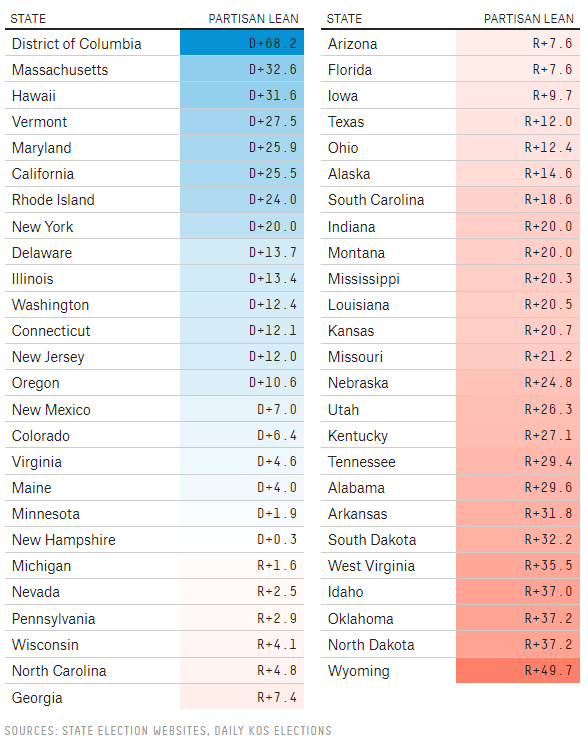